In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

In [4]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_test_original = x_test
y_test_original = y_test

# Normalizar las imágenes y convertir las etiquetas a one-hot encoding
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Crear una instancia del modelo preentrenado VGG16 sin incluir las capas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas adicionales para adaptar el modelo a la tarea de clasificación
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
391/391 [==============================] - 89s 225ms/step - loss: 1.4148 - accuracy: 0.5085 - val_loss: 1.2710 - val_accuracy: 0.5574
Epoch 2/10
391/391 [==============================] - 94s 242ms/step - loss: 1.2064 - accuracy: 0.5805 - val_loss: 1.2230 - val_accuracy: 0.5728
Epoch 3/10
391/391 [==============================] - 114s 293ms/step - loss: 1.1438 - accuracy: 0.6012 - val_loss: 1.1934 - val_accuracy: 0.5799
Epoch 4/10
391/391 [==============================] - 148s 379ms/step - loss: 1.1045 - accuracy: 0.6168 - val_loss: 1.1584 - val_accuracy: 0.5937
Epoch 5/10
391/391 [==============================] - 154s 393ms/step - loss: 1.0741 - accuracy: 0.6246 - val_loss: 1.1332 - val_accuracy: 0.6033
Epoch 6/10
391/391 [==============================] - 132s 338ms/step - loss: 1.0439 - accuracy: 0.6344 - val_loss: 1.1271 - val_accuracy: 0.6061
Epoch 7/10
391/391 [==============================] - 93s 237ms/step - loss: 1.0182 - accuracy: 0.6446 - val_loss: 1.1132 - va

313/313 [==============================] - 19s 61ms/step


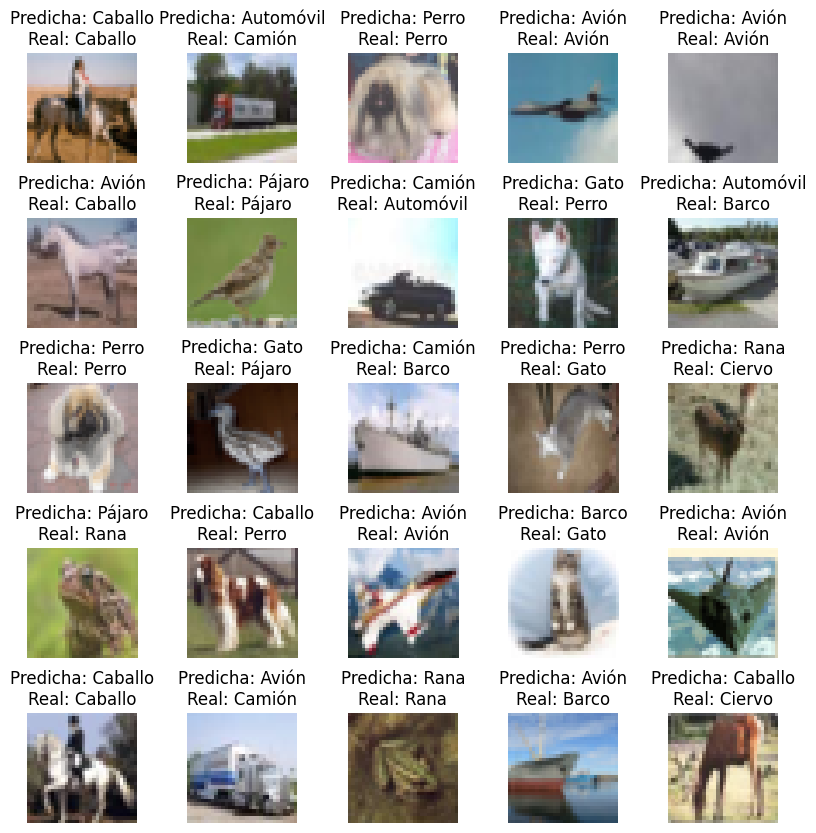

In [5]:
# Obtener predicciones en el conjunto de prueba
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Seleccionar 25 índices aleatorios para mostrar las imágenes
random_indices = np.random.choice(range(len(x_test)), size=25, replace=False)

# Configurar la matriz de imágenes de 5x5
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

# Mostrar las imágenes y las etiquetas predichas y reales
for i, idx in enumerate(random_indices):
    ax = axes[i // 5, i % 5]
    ax.imshow(x_test_original[idx])
    ax.axis('off')
    predicted_label = predicted_labels[idx]
    true_label = true_labels[idx]
    ax.set_title(f'Predicha: {class_names[predicted_label]}\nReal: {class_names[true_label]}')

plt.show()

Se observa que el modelo sin entrenamiento previo obtiene un mejor rendimiento en términos de pérdida (loss) y precisión (accuracy) en comparación con el modelo preentrenado. Esto puede ocurrir por varias razones:

- Diferencia en la arquitectura del modelo: El modelo sin entrenamiento previo utiliza una arquitectura personalizada que puede ser más adecuada para la tarea específica de clasificación de imágenes en el dataset CIFAR-10. El modelo preentrenado VGG16, aunque es muy potente, fue entrenado en un conjunto de datos diferente (ImageNet) y puede no ser óptimo para esta tarea particular.

- Tamaño del conjunto de datos: El dataset CIFAR-10 es relativamente pequeño en comparación con otros conjuntos de datos utilizados para entrenar modelos preentrenados como ImageNet. Esto puede resultar en un sobreajuste (overfitting) más probable cuando se utiliza un modelo preentrenado, ya que el modelo puede haber capturado características demasiado generales durante su entrenamiento inicial.

- Capacidad de adaptación del modelo sin entrenamiento previo: Al entrenar un modelo desde cero, tienes la libertad de ajustar la arquitectura y los hiperparámetros específicamente para la tarea y el conjunto de datos en cuestión. Esto permite una adaptación más precisa y puede conducir a un mejor rendimiento en comparación con un modelo preentrenado más general.

Es importante tener en cuenta que los resultados pueden variar dependiendo de los conjuntos de datos y las tareas específicas. En algunos casos, un modelo preentrenado puede proporcionar un mejor rendimiento al aprovechar características aprendidas en conjuntos de datos más grandes y diversos. Sin embargo, en este caso particular, el modelo sin entrenamiento previo mostró un mejor rendimiento.

| Ejemplo 1 (modelo preentrenado VGG16)                                                         | Ejemplo 2 (sin modelo preentrenado)                                          | Descripción                                                                 |
|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| `base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))` |                                                                              | Crear una instancia del modelo preentrenado VGG16 sin incluir las capas superiores |
|                                                                                               | `model = tf.keras.models.Sequential()`                                        | Crear un modelo sin modelo preentrenado                                     |
|                                                                                               | `model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))` | Agregar una capa convolucional con 32 filtros, tamaño de filtro 3x3 y función de activación 'relu', especificando la forma de entrada |
|                                                                                               | `model.add(tf.keras.layers.MaxPooling2D((2, 2)))`                            | Agregar una capa de pooling máxima con tamaño de pool 2x2                   |
|                                                                                               | `model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))`           | Agregar una capa convolucional con 64 filtros y tamaño de filtro 3x3 con función de activación 'relu' |
|                                                                                               | `model.add(tf.keras.layers.MaxPooling2D((2, 2)))`                            | Agregar una capa de pooling máxima con tamaño de pool 2x2                   |
|                                                                                               | `model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))`           | Agregar una capa convolucional con 64 filtros y tamaño de filtro 3x3 con función de activación 'relu' |
| `model = tf.keras.models.Sequential()`                                                        |                                                                              | Crear un modelo secuencial                                                   |
| `model.add(base_model)`                                                                       |                                                                              | Agregar el modelo base (VGG16) al modelo secuencial                          |
| `model.add(tf.keras.layers.Flatten())`                                                        | `model.add(tf.keras.layers.Flatten())`                                        | Agregar una capa de aplanamiento                                             |
| `model.add(tf.keras.layers.Dense(256, activation='relu'))`                                    | `model.add(tf.keras.layers.Dense(64, activation='relu'))`                    | Agregar una capa densa con 256 neuronas y función de activación 'relu'       |
| `model.add(tf.keras.layers.Dense(10, activation='softmax'))`                                  | `model.add(tf.keras.layers.Dense(10, activation='softmax'))`                 | Agregar una capa densa con 10 neuronas (salida) y función de activación 'softmax' |
| `model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`      | `model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])` | Compilar el modelo con el optimizador 'adam', la función de pérdida 'categorical_crossentropy' y la métrica de precisión 'accuracy' |
| `model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))`    | `model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))` | Entrenar el modelo con los datos de entrenamiento, tamaño de lote 128, 10 épocas y datos de validación |
| `loss, accuracy = model.evaluate(x_test, y_test)`                                             | `loss, accuracy = model.evaluate(x_test, y_test)`                             | Evaluar el modelo en el conjunto de prueba                                   |
| `print(f'Loss: {loss}, Accuracy: {accuracy}')`                                                | `print(f'Loss: {loss}, Accuracy: {accuracy}')`                               | Imprimir la pérdida y la precisión del modelo                                |